<a href="https://colab.research.google.com/github/Vivek-afk81/data_mining/blob/main/clustering_techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
# Change to a specific directory
os.chdir('/content/drive/My Drive/data_mining')

# Verify current directory
print(os.getcwd())

/content/drive/My Drive/data_mining


##HEIRARCHIAL CLUSTERING

###Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering      # for clustering
from scipy.cluster.hierarchy import dendrogram, linkage  # for clustering and visualization
from sklearn.cluster import KMeans                       # for kMeans
from sklearn.cluster import DBSCAN
from sklearn.model_selection import GridSearchCV         # for grid search
from sklearn.metrics import silhouette_score             # for metrics and score
from sklearn.preprocessing import StandardScaler         # for feature scaling standardizing the data
from sklearn.neighbors import NearestNeighbors


###Load and prepare data

Read the penguins.csv file from the data directory into variable df . Select a random sample of 75 cases of the dataset for easy visualization. Keep all
features in variable df and store the class variable in y.

In [ ]:
df=pd.read_csv("data/penguins.csv")

df=df.sample(n=75,random_state=1)

y=df.y

df=df.drop('y',axis=1)

df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
102,37.8,20.0,190.0,4250.0
125,38.8,17.6,191.0,3275.0
11,41.1,17.6,182.0,3200.0
248,46.9,14.6,222.0,4875.0
238,51.3,14.2,218.0,5300.0


<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

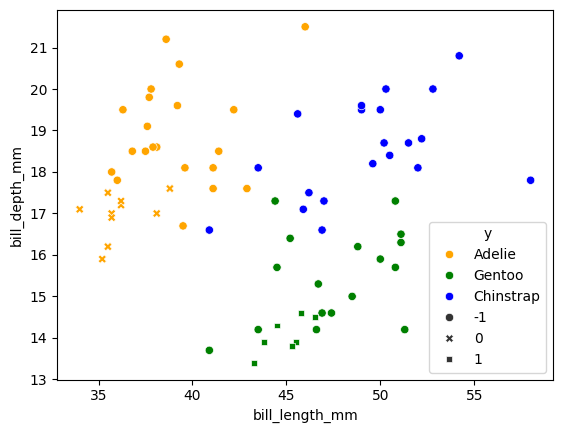

In [ ]:
sns.scatterplot(
x='bill_length_mm',
y='bill_depth_mm',
data=df,
hue=y,
style=db.labels_,
palette=['orange', 'green', 'blue'])

###Hierarchial clustering

The scipy.cluster. hierarchy package contains two functions, i.e., linkage() and dendogram( ) for hierarchical clustering. The linkage ()
function performs agglomerative clustering and the dendogram( ) function displays the clusters. Various linkage methods are possible. Here we'll use
the ward linkage method that merges clusters so that variance of the clusters is minimized. Other linkage options are:

* average
* single
* complete

The linkage ( ) function returns a linkage matrix with information about clusters. This matrix can be viewed using the dendogram( ) function. The code
below performs clustering using the euclidean metric and displays the clusters.

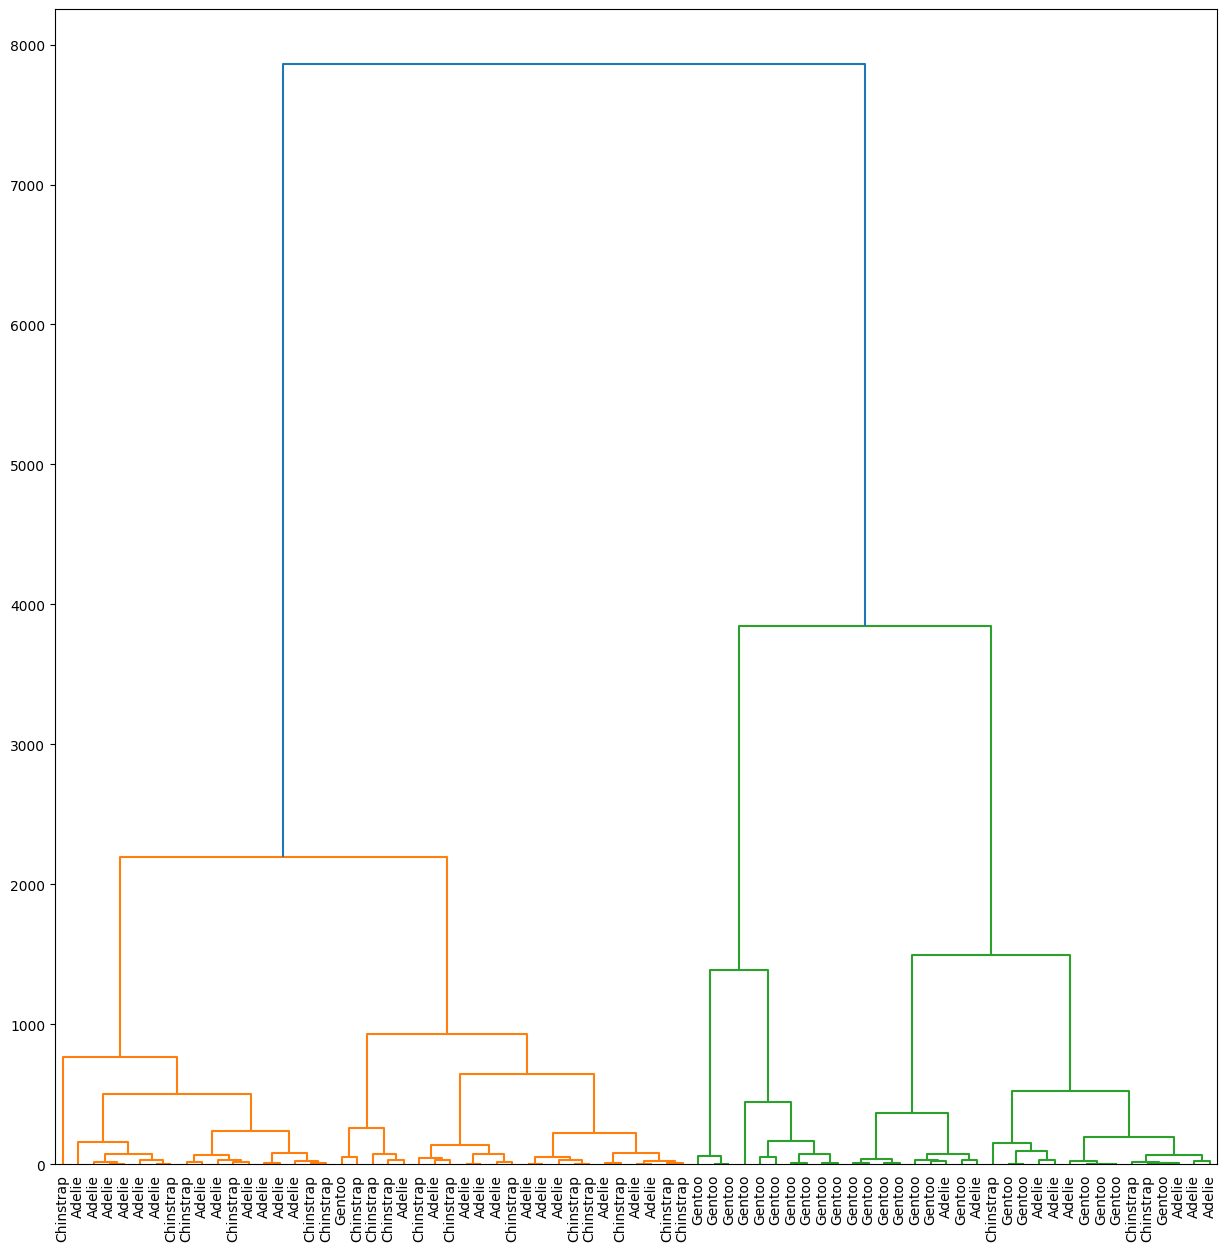

In [ ]:
#Performs agglomerative clustering using ward linkage and 'euclidean' metric
hc=linkage(df,method='ward',metric='euclidean')

#setup the figure data
fig=plt.figure(figsize=(15,15))

#display the dendrogram
#the lambda function sets up the labels for each leaf
dn=dendrogram(
    hc,
    leaf_label_func= lambda id: y.values[id],
    leaf_font_size=10
)

##k-MEANS CLUSTERING



###Standardizing the data

**Standard Scaler** (often called standardization or z-score scaling) transforms features so they have a mean of 0 and a standard deviation of 1.

For each feature (column), it computes:
       
$z = \frac{x - \mu}{\sigma}$

* x: original value
* μ: mean of the feature
* σ: standard deviation of the feature
       



In [ ]:
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df)
df_scaled=pd.DataFrame(df_scaled,
                columns=df.columns)
#Comparison between scaled dataset and original dataset
print(df)
print(df_scaled)

# df=pd.DataFrame(
#     StandardScaler().fit_transform(df),
#     columns=df.columns
# )
# df.head()

     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
102            37.8           20.0              190.0       4250.0
125            38.8           17.6              191.0       3275.0
11             41.1           17.6              182.0       3200.0
248            46.9           14.6              222.0       4875.0
238            51.3           14.2              218.0       5300.0
..              ...            ...                ...          ...
73             35.5           17.5              190.0       3700.0
287            52.0           18.1              201.0       4050.0
304            40.9           16.6              187.0       3200.0
165            45.8           14.6              210.0       4200.0
329            52.2           18.8              197.0       3450.0

[75 rows x 4 columns]
    bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0        -1.056299       1.343617          -0.780348     0.216418
1        -0.882832       0.138579        

###Running k-Means

####**k-Means** : Train the model

We'll set up a KMeans object with the following parameters:

*  n_clusters : Total number of clusters to make.
*  random_state : Set to one to reproduce these results.
*  init : How to initialize the k-means centers; we'll use k-means++
*  n_init : Number of times k-means would be run; the model returned would have the minimum value of inertia

A few attributes of the KMeans object, which are also used in this demo are:

*  cluster_centers _: Stores the discovered cluster centers.
*  labels _: Label of each instance.
*  inertia : Sum of square of distances of each instance from its corresponding center.
*  n_iter : Number of iterations run to find the centers.

In [ ]:
km=KMeans(
    n_clusters=3,
    random_state=1,
    init='k-means++',
    n_init=10
)
#fit the model into the data
km.fit(df_scaled)

#display
km.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 10,
 'random_state': 1,
 'tol': 0.0001,
 'verbose': 0}

####k-Means: Visualize the Clusters


The code below creates a scatterplot of the first two features. Each point is colored according to its actual label. For comparison, each instance is drawn with
a marker according to the label found by the clustering algorithm.


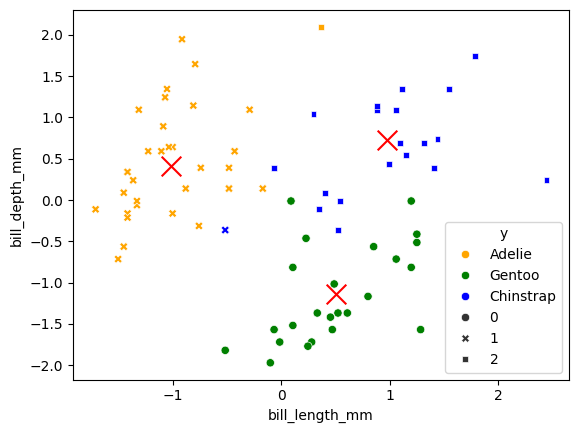

In [ ]:
# Reset the index of y to align with df and km.labels_
y_aligned = y.reset_index(drop=True)

# Creates a scatter plot
sns.scatterplot(
    x='bill_length_mm',
    y='bill_depth_mm',
    data=df_scaled,
    hue=y_aligned,  # Use the aligned y
    style=km.labels_,
    palette=["orange", "green", "blue"])

# Adds cluster centers to the same plot
plt.scatter(
    km.cluster_centers_[:,0],
    km.cluster_centers_[:,1],
    marker='x',
    s=200,
    c='red')

####k-MEANS: Optimizr via silhoutte scores

The main challenge in k-means is to find the optimal number of clusters. We can set up a GridSearchCV object to search for the optimal parameters. For k-
Mmeans, we require a custom scorer that computes the silhouette value for different number of clusters specified by n_clusters . The custom scorer is
called s2 () in the code below, where it uses silhouette_score() from the sklearn.metrics library to compute a score for an instance x .

A silhouette score is a value in [-1,+1]. It is a means for comparing how similar an instance is to its corresponding cluster compared to its similarity with other
clusters. Formally, it takes into account cohesion and separation to compute a silhouette value. A +1 or close to this score value indicates better
clusters.



In [ ]:
# Custom scorer
def s2(estimator, X, y=None):
    labels = estimator.fit_predict(X)
    return silhouette_score(X, labels)

# Parameter grid
param = range(2, 10)

# KMeans object
km = KMeans(random_state=0, init='k-means++')

# GridSearchCV
grid = GridSearchCV(
    km,
    {'n_clusters': param},
    scoring=s2,
    cv=2
)

# Fit
grid.fit(df_scaled)

# Best model
best_km = grid.best_estimator_

# Display best parameters
best_km.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 2,
 'n_init': 'auto',
 'random_state': 0,
 'tol': 0.0001,
 'verbose': 0}

####Plot of Scores for Different Number of Clusters
The grid object has an attribute cv_results_ through which the scores for different n_clusters can be accessed.

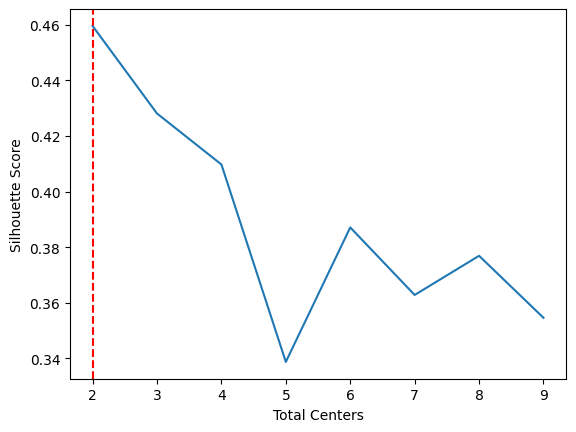

In [ ]:
# Plot mean_test_scores vs. n_clusters
plt.plot(
    param,
    grid.cv_results_['mean_test_score']
)

# Draw a vertical line where the best model is
plt.axvline(
    x=best_km.n_clusters,
    color='red',
    ls='--'
)

# Add labels to the plot
plt.xlabel('Total Centers')
plt.ylabel('Silhouette Score')

plt.show()


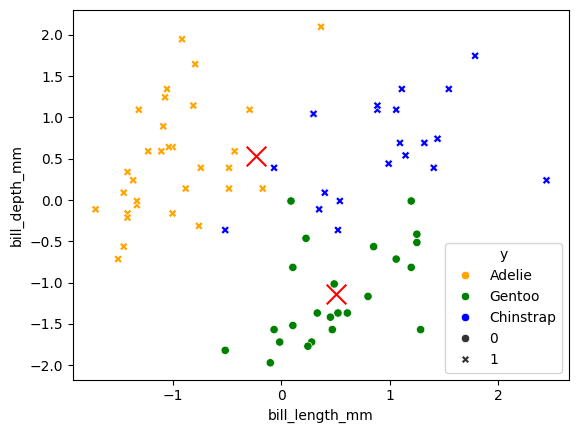

In [ ]:
# sns.scatterplot(
#     x=df_scaled['bill_length_mm'], # Changed from df_scaled[:, 0]
#     y=df_scaled['bill_depth_mm'],  # Changed from df_scaled[:, 1]
#     style=best_km.labels_,
#     palette=['orange', 'green', 'blue']
# )

sns.scatterplot(
    x='bill_length_mm',
    y='bill_depth_mm',
    data=df_scaled,
    hue=y_aligned,
    style=best_km.labels_,
    palette=['orange', 'green', 'blue']
)
plt.scatter(
    best_km.cluster_centers_[:, 0],
    best_km.cluster_centers_[:, 1],
    marker='x',
    s=200,
    c='red'
)

##DENSITY BASED SPATIAL CLUSTERING OF APPLICATIONS WITH NOISE

In [ ]:
df_scaled.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,-1.056299,1.343617,-0.780348,0.216418
1,-0.882832,0.138579,-0.706452,-1.052163
2,-0.483858,0.138579,-1.371521,-1.149746
3,0.522252,-1.367718,1.584343,1.029610
4,1.285507,-1.568558,1.288757,1.582582


###DBSCAN: CLUSTERING DATA
There are two steps for running DBSCAN. In the first step, we'll determine the parameter values and in the second step, we'll fit the model to data.

####**Step 1**: Determine the Parameters
For DBSCAN clustering, we need two parameters:

* min_samples : Minimum number of neighboring points for clustering.
* eps : Epsilon neighborhood radius

To find the optimal value of eps , we'll construct a plot of distances of min_samples (variable k in code below) nearest neighbors and look for a
pronounced bend, also called a "knee." The code below uses the NearestNeighbors object to find the distances and plots them.

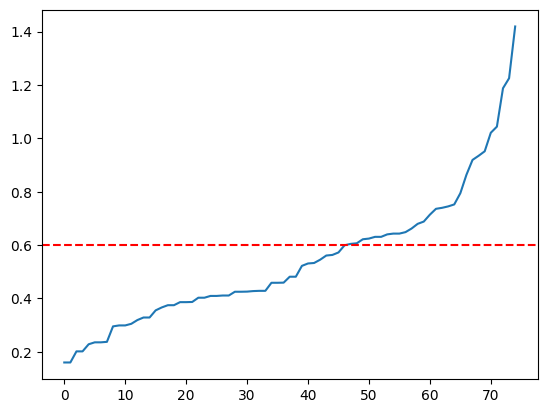

In [ ]:
k = 7

# Fits a NearestNeighbors object to df
nn = NearestNeighbors(n_neighbors=k) \
.fit(df_scaled)

# Finds the distance of k closest neighbors
dist, ind = nn.kneighbors (df_scaled)

# Sorts the distances
dist = np.sort(dist, axis=0) [:,1]

# Plots the distances
plt.plot(dist)

# Draws a horizontal line at the bend
plt.axhline(y =.6, color='red', ls='--')

####**Step 2**: Fit the Model
Create a DBSCAN object with the parameters found and visualize the clusters. Each point is colored according to its actual label. For comparison, each
instance is drawn with a marker according to the label found by the clustering algorithm.

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

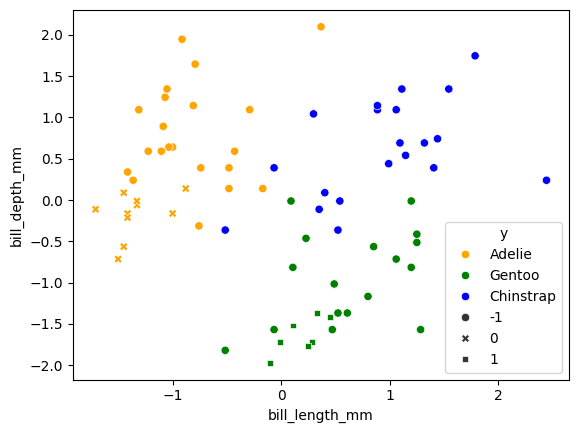

In [ ]:
# Fits a DBSCAN object to df
db=DBSCAN (eps=0.6, min_samples=k) \
    .fit(df_scaled)

# Creates a scatter plot to visualize the clusters
sns.scatterplot(
x='bill_length_mm',
y='bill_depth_mm',
data=df_scaled,
hue=y_aligned,
style=db.labels_,
palette=['orange', 'green', 'blue'])